In [9]:
import os
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)             

In [10]:
# 많은 훈련데이터 
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 20000
validation_samples = 2000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기', data.shape)
print('레이블 텐서의 크기', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기 (25000, 100)
레이블 텐서의 크기 (25000,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 2000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 324us/sample - loss: 0.4324 - acc: 0.7904 - val_loss: 0.3513 - val_acc: 0.8480
Epoch 2/10
20000/20000 [==============================] - 6s 309us/sample - loss: 0.1411 - acc: 0.9477 - val_loss: 0.4525 - val_acc: 0.8315
Epoch 3/10
20000/20000 [==============================] - 6s 314us/sample - loss: 0.0167 - acc: 0.9958 - val_loss: 0.6957 - val_acc: 0.8205
Epoch 4/10
20000/20000 [==============================] - 6s 309us/sample - loss: 0.0013 - acc: 0.9997 - val_loss: 0.9776 - val_acc: 0.8180
Epoch 5/10
20000/20000 [==============================] - 6s 306us/sample - loss: 2.7233e-04 - acc: 0.9999 - val_loss: 1.1296 - val_acc: 0.8145
Epoch 6/10
20000/20000 [==============================] - 6s 310us/sample - loss: 2.4798e-07 - acc: 1.0000 - val_loss: 1.2700 - val_acc: 0.8180
Epoch 7/1

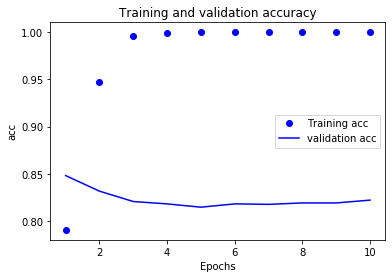

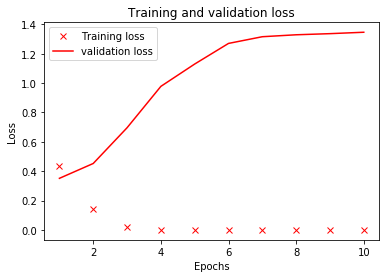

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()  # 2개의 그래프로 분리

plt.plot(epochs, loss, 'rx', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

3000/3000 [==============================] - 0s 46us/sample - loss: 1.2615 - acc: 0.8193


[1.261493672211965, 0.8193333]

In [15]:
model.predict(x_test[:10])

array([[0.0000000e+00],
       [1.0000000e+00],
       [9.9487519e-01],
       [9.9976194e-01],
       [2.7418137e-06],
       [1.3794720e-02],
       [9.9987149e-01],
       [9.9991465e-01],
       [1.0000000e+00],
       [9.5810089e-03]], dtype=float32)

In [16]:
print(y_test[:10])

[0 1 0 0 0 0 1 1 1 0]
